In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [2]:
import seaborn as sns 

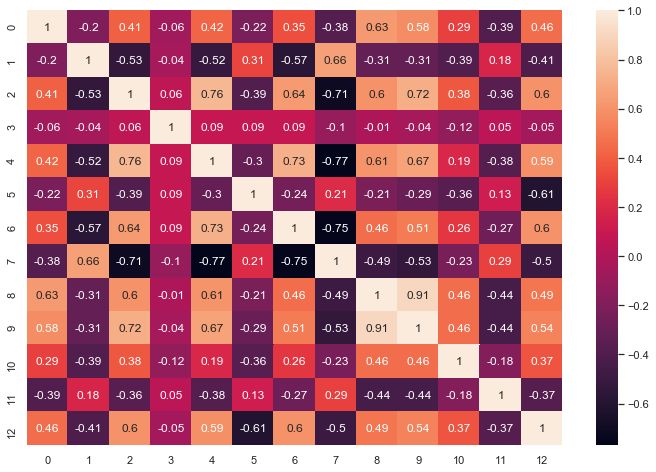

In [3]:
# Find correlation matrix between independent variables
sns.set(rc={'figure.figsize':(12,8)})
correlation_matrix = bos.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot= True)

In [4]:
y = bos[12]
X = bos[[0,1,2,3,4,5,6,7,10,11]]
X

,0,1,2,3,4,5,6,7,10,11
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90
...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,21.0,391.99
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,21.0,396.90
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,21.0,396.90
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,21.0,393.45


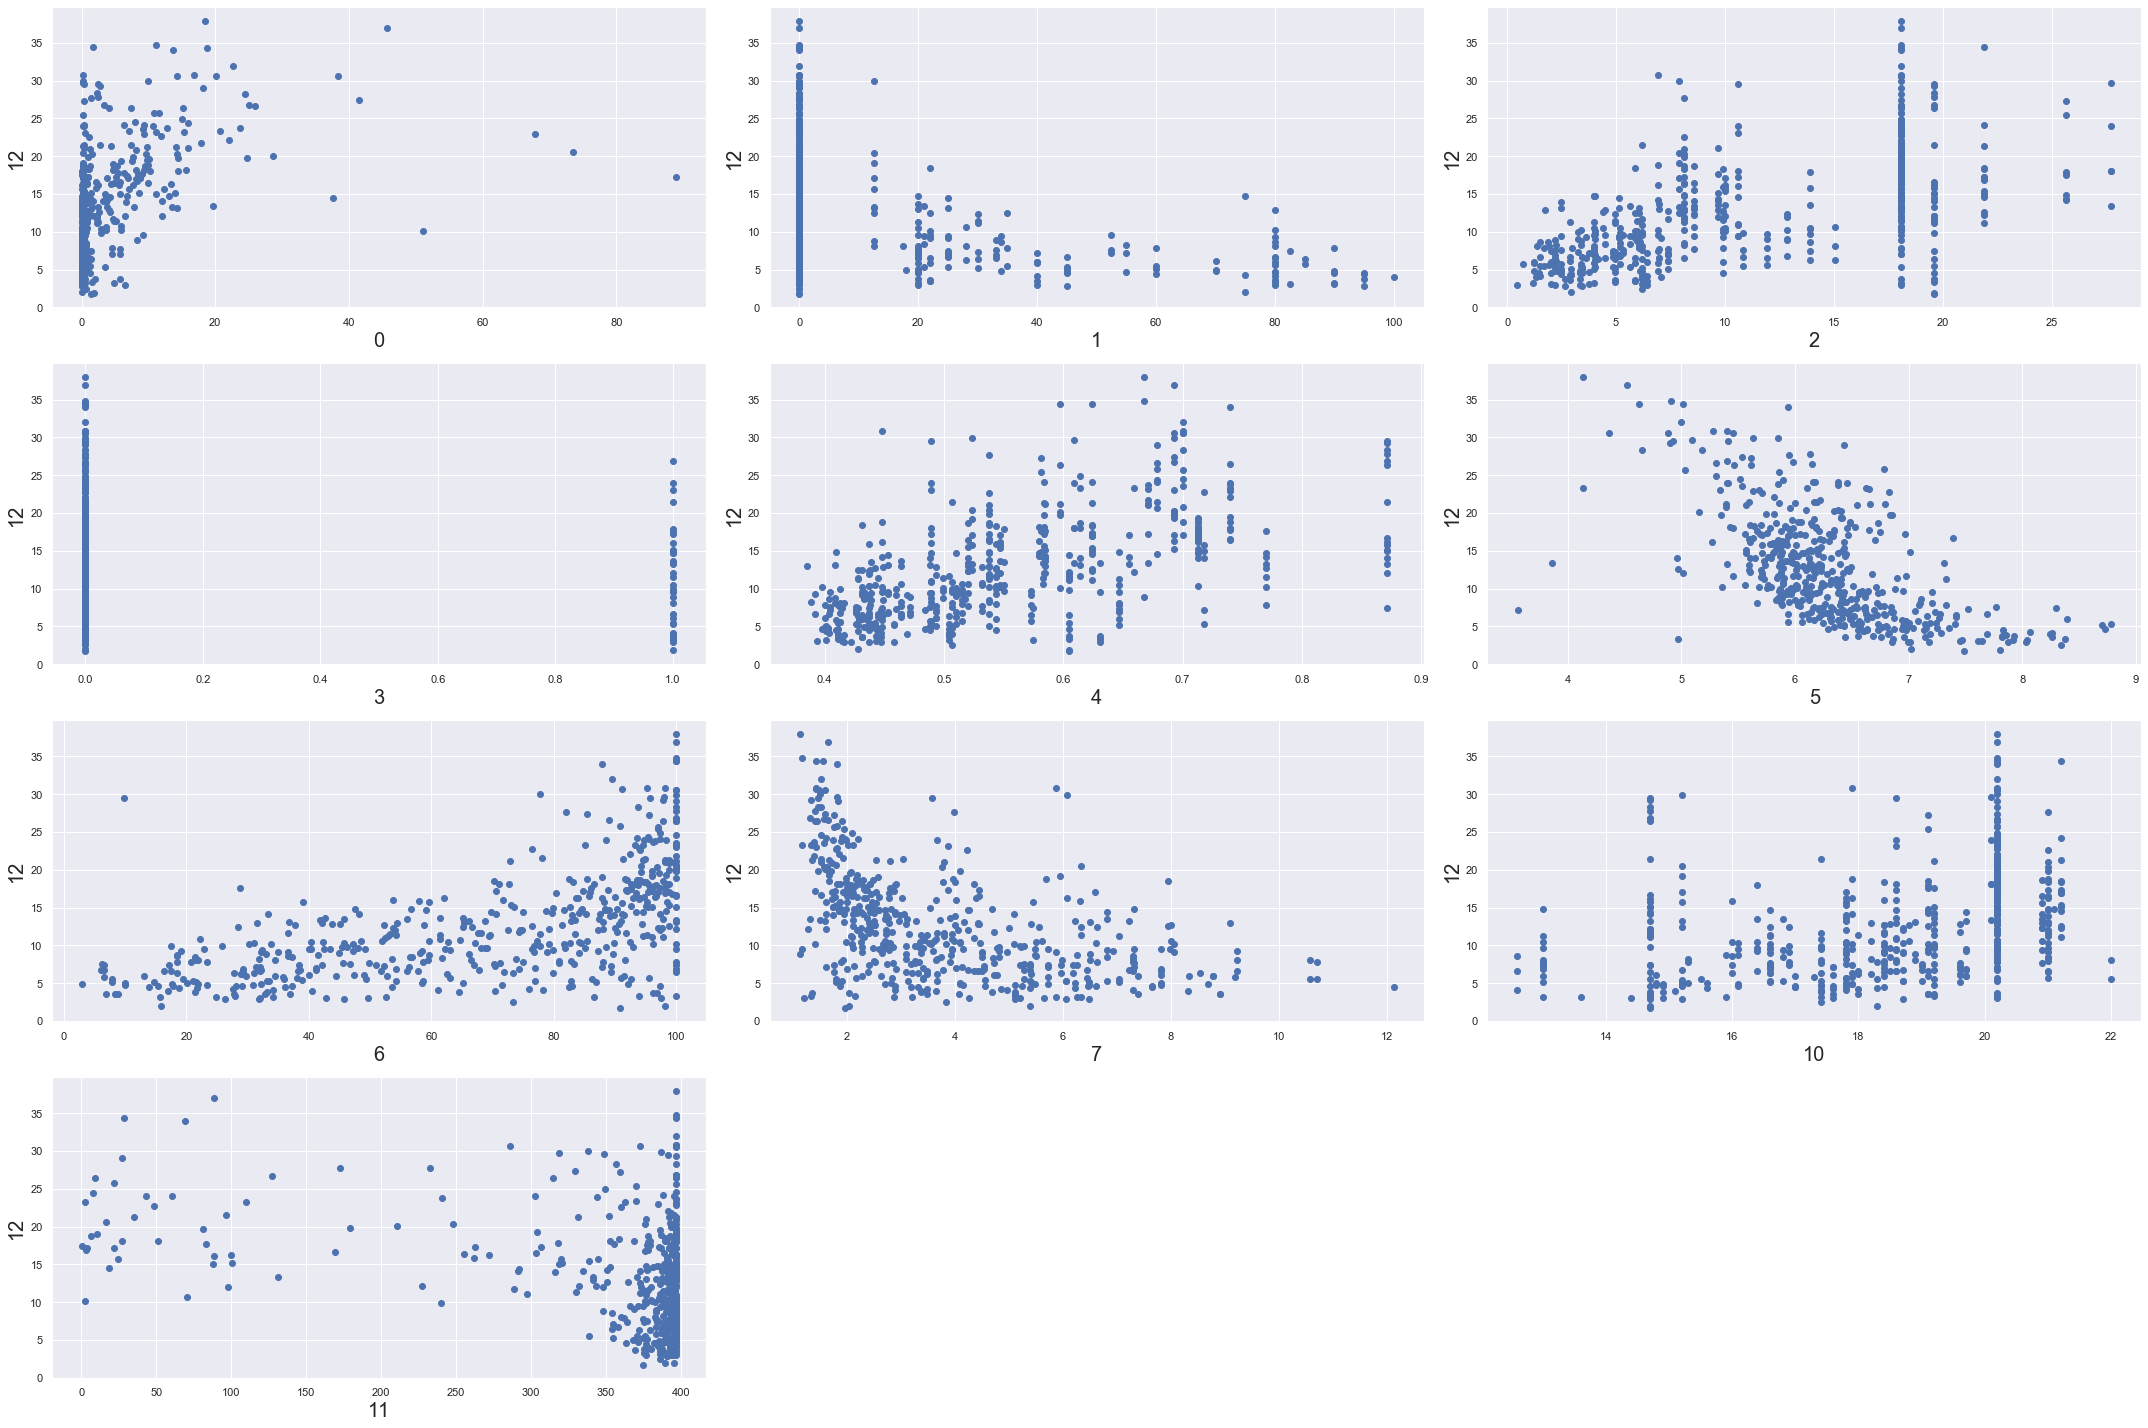

In [5]:
plt.figure(figsize=(30,20), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=12 :
        ax = plt.subplot(4,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel(12,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [6]:
from sklearn.preprocessing import StandardScaler 
scaler =StandardScaler()

X_scaled = scaler.fit_transform(X)

In [7]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled

# we create a new data frame which will include all the VIFs
# note that each variable has its own variance inflation factor as this measure is variable specific (not model specific)
# we do not include categorical values for mulitcollinearity as they do not provide much information as numerical ones do
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns
vif

,VIF,Features
0,1.426990,0
1,2.147752,1
2,3.157490,2
3,1.054332,3
4,3.873095,4
5,1.333336,5
6,2.722148,6
7,3.948686,7
8,1.489653,10
9,1.281784,11


In [8]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.25,random_state=355)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 10)
(127, 10)
(379,)
(127,)


In [10]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

regression.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Using training data
regression.score(x_train,y_train)

0.6906091292712849

In [12]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

adj_r2(x_train,y_train)

0.6822017686536568

In [13]:
# Using test data
regression.score(x_test,y_test)

0.5432856552429801

In [14]:
adj_r2(x_test,y_test)

0.5039137289708233

In [15]:
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV

In [16]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [17]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0076617818584756745

In [18]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.0076617818584756745, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
lasso_reg.score(x_test, y_test)

0.5431359289826234

In [20]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

RidgeCV(alphas=array([0.74406321, 7.26785912, 7.06484292, 4.98078505, 4.35950247,
       7.85953785, 8.29478227, 1.80150658, 0.98083048, 5.02631972,
       2.65158321, 0.36484973, 3.18962977, 3.75423738, 2.19640509,
       5.3869389 , 1.91731292, 6.25789082, 8.41711104, 5.01196734,
       2.89451187, 9.94426961, 5.45446748, 6.52124688, 7.6508622 ,
       2.83269548, 4.19771273, 6.34854292, 5.38644041, 2.35505136,
       4.03998286, 8.74287735, 0.21343256, 5.19839995, 6.85513368,
       9.29944727, 9.2080645 , 9.93122335, 2.95966379, 5.28214977,
       7.92087795, 7.12215773, 5.96021826, 4.44476362, 1.04584142,
       1.41736397, 9.81818987, 1.24047782, 0.28789896, 6.24225999]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [21]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

Ridge(alpha=0.21343256016493561, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [22]:
ridge_model.score(x_test, y_test)

0.543356006458552